In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
import matplotlib.pyplot as plt
import os

In [55]:
data = pd.read_csv('dataset/preprocessed_data.csv', parse_dates=['timestamp'], index_col='timestamp')

In [56]:
data.shape

(8726, 24)

In [57]:
def train_test_data(data,parameter):

    data.dropna()
    
    train_data = data.iloc[:7000, : ]
    test_data = data.iloc[7000:, : ]

    X_train = train_data.drop(parameter, axis= 1)
    y_train = train_data[parameter].copy()
    X_test = test_data.drop(parameter, axis= 1)
    y_test = test_data[parameter].copy()

    return X_train, y_train, X_test, y_test, parameter

In [58]:
def svr_model(X_train, y_train, X_test, y_test, parameter):

    # Define the hyperparameters to search
    params = {'C': [0.01, 0.1, 1, 10],
          'kernel': ['linear', 'rbf', 'poly'],
          'epsilon': [0.01, 0.1, 1, 10]
        
            }

    # Create an SVR model
    model = SVR()

    # Perform grid search to find the best hyperparameters
    grid = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid.fit(X_train, y_train)

    # Print the best hyperparameters and the corresponding score
    print("Best hyperparameters: ", grid.best_params_)


    # Use the best hyperparameters to fit the model on the training data
    best_model = grid.best_estimator_
    best_model.fit(X_train, y_train)

    # Predict the temperature for the training and testing sets using the best model
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Print evaluation metrics in a table format
    results = pd.DataFrame({'Metric': ['RMSE', 'R^2', 'MAPE', 'MAE'],
                            'Training': [train_rmse, train_r2, train_mape, train_mae],
                            'Testing': [test_rmse, test_r2, test_mape, test_mae]})
    
    # print(results)

    # Plot the real versus predicted values for target variables
    print("debugging values")
    print(y_test_pred)
    print("debugging values")
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Real {}'.format(parameter.capitalize()))
    plt.plot(y_test_pred, label='Predicted {}'.format(parameter.capitalize()))
    plt.title('Support Vector Regression')
    plt.xlabel('Time')
    plt.ylabel(parameter.capitalize())
    plt.legend()
    plt.show()

    return()

Best hyperparameters:  {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}
debugging values
[0.25639543 0.26974324 0.26951762 ... 0.74203449 0.76602151 0.78487143]
debugging values


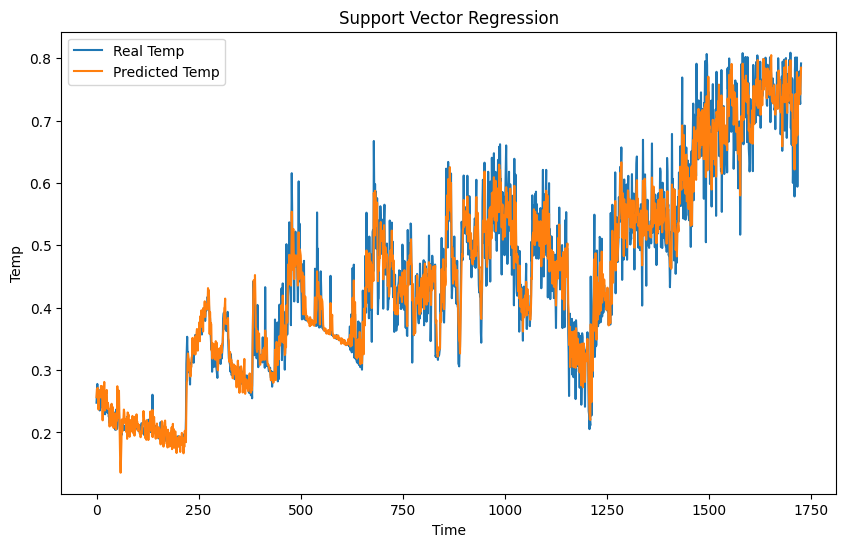

()

In [59]:
model_data= train_test_data(data, 'temp')
X_train, y_train, X_test, y_test, parameter= model_data

svr_model(X_train, y_train, X_test, y_test, parameter)